In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep

In [2]:
driver = "./chromedriver"

In [ ]:
browser = webdriver.Chrome("/Users/prateekmishra/Desktop/chromedriver")

In [ ]:
## Data we want Collect (Store)
Titles = []
Locations = []
Companies = []
Salary = []
JobDetails = []

from time import sleep

In [ ]:
for i in range(0, 50, 10):
    browser.get("https://www.indeed.co.in/jobs?q=machine+learning&l=India&start={}".format(i))
    sleep(2)
    while True:
        try:
            Cards = browser.find_elements_by_class_name("result")
            break
        except:
            popUp = browser.find_element_by_id("popover-x")
            popUp.click()
            
    
    for Card in Cards:
        details = BeautifulSoup(Card.get_attribute('innerHTML'), 'html.parser')
        try:
            title = details.find('a', class_ = 'jobtitle').text.replace("\n", "")
            Titles.append(title)
        except:
            Titles.append(None)

        try:
            location = details.find(class_ = 'location').text.replace("\n", "")
            Locations.append(location)
        except:
            Locations.append(None)

        try:
            company = details.find(class_ = 'company').text.replace("\n", "")
            Companies.append(company)
        except:
            Companies.append(None)


        try:
            salary = details.find(class_ = 'salary').text.replace("\n", "")
            Salary.append(salary)
        except:
            Salary.append(None)

        
            
        while True:
            try:
                Card.click()
                sleep(0.5)
                try:
                    Des = browser.find_element_by_id("vjs-desc")
                    DecHTML = BeautifulSoup(Des.get_attribute("innerHTML"), "html.parser")
                    all_li = DecHTML.find_all("li")
                    all_li_text = []
                    for i in all_li:
                        all_li_text.append(i.text.replace("\n", ""))
                    all_li_text = " ".join(all_li_text)
                    JobDetails.append(all_li_text)
                except:
                    JobDetails.append(None)
                break
            except:
                popUp = browser.find_element_by_id("popover-x")
                popUp.click()    
            
            
        

In [ ]:
Titles

['Software Developer - Machine Learning & AI',
 'AI/Machine Learning Engineer',
 'Machine Learning',
 'Machine Learning Engineer',
 'Computer Vision Research Engineer - Machine Learning',
 'Machine Learning Engineer Intern',
 'Software Engineer – Machine Learning',
 'Machine Learning Engineer',
 'Software Engineer, University Graduate, 2021 Start',
 'Software Developer',
 'Software Developer',
 'Machine Learning Engineer',
 'Software Developer (Artificial intelligence, Java, Python,MI...',
 'MACHINE LEARNING ENGINEER',
 'Machine Learning Engineer']

In [ ]:
## Save Data In CSV File
import pandas as pd
df = pd.DataFrame({
    "Title":Titles,
    "Company":Companies,
    "Location":Locations,
    "Salary":Salary,
    "Details":JobDetails
})

In [ ]:
df.to_csv("MachineLearningJobs.csv")

In [ ]:
1 - Machine Learning
2 - Artificial Intelligence
3 - Data Science
4 - Data Analytic
5 - Web Development
6. Django Developer
7. ReactJs 

In [ ]:
### Basic of NLP, NLTK

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("ai.csv")
df2 = pd.read_csv("data_analyst.csv")
df3 = pd.read_csv("datascience2.csv")
df4 = pd.read_csv("machinelearning.csv")

In [ ]:
df = pd.concat([df1, df2, df3, df4], axis=0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
## Companies who have max jobs...

In [ ]:
group = df.groupby("Company").count()["Title"].sort_values(ascending = False)[:15]

In [ ]:
group

Company
Micro Focus             28
Telstra                 14
TARGET                  13
SAP                     12
Covance                 11
Paypal                  11
Infosys                 11
Akamai                  10
JP Morgan Chase         10
Wells Fargo              9
HERE Technologies        8
Fidelity Investments     8
Pitney Bowes             7
Accenture                7
CommScope                6
Name: Title, dtype: int64

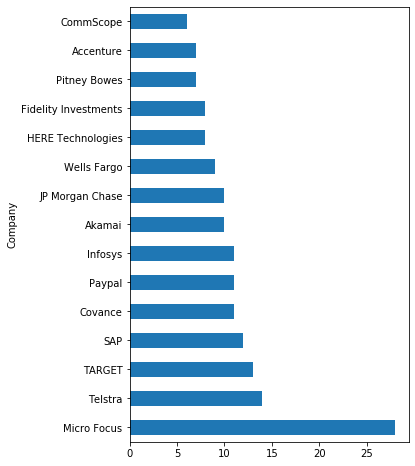

In [ ]:
group.plot(kind = "barh", figsize = (5, 8))

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Title', 'Location', 'Company', 'Salary', 'Sponsored',
       'Description'],
      dtype='object')

In [ ]:
###NLTK - NLP Concept (Stop Words..)

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [ ]:
def CleanData(desc):
    words = word_tokenize(str(desc))
    imp_words = []
    for word in words:
        lower = word.lower()
        if lower not in stop_words:
            imp_words.append(lower)

    return imp_words
        

In [ ]:
dfDes = df.Description.dropna()

In [ ]:
tags = dfDes.apply(CleanData)

In [ ]:
from collections import Counter

In [ ]:
result = tags.apply(Counter).sum().items()

In [ ]:
sample = [('vendor', 52),
            ('master', 134),
            ('data', 5659),
            ('analyst', 332),
            ('part', 340),
            ('global', 453),
            ('team', 1741)
         ]

In [ ]:
result = sorted(result, key = lambda s: s[1], reverse = True)

In [ ]:
resultData = pd.Series({
    k:v for k,v in result
})

In [ ]:
resultData

,                 23692
.                 13728
data               5659
:                  5065
experience         3789
                  ...  
nosqldatabases        1
neuralnetworks        1
pcfg                  1
co-reference          1
memm                  1
Length: 14936, dtype: int64

In [ ]:
skills = ["django", "opencv", "pandas", "math", "nltk"]

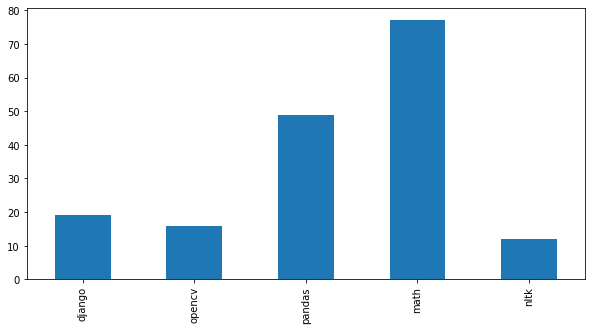

In [ ]:
Filter = resultData.filter(items=skills)
Filter.plot(kind = "bar", figsize = (10, 5))
plt.show()

In [ ]:
Filter

django    19
opencv    16
pandas    49
math      77
nltk      12
dtype: int64